# LENDING LOAN CASE STUDY

Problem Statement: Lending Company facilitates personal loans, business loans, and financing of medical procedures. 
They want to understand the driving factors (or driver variables) behind loan defaults, i.e. the variables which are strong indicators of a default. The company can utilise this knowledge for its portfolio and risk assessment. 

Data Set: Sample dataset contains information of loans issued from 2007 t0 2011

Assumptions: Taking "loan_status" as target variable, which can be used to identify if an applicant defaulted

### Import libraries

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 200)

import warnings
warnings.filterwarnings("ignore")

### Reading data

In [27]:
loanDf = pd.read_csv("loan/loan.csv",index_col=0)

In [28]:
loanDf.head(5)

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [29]:
loanDf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39717 entries, 1077501 to 87023
Columns: 110 entries, member_id to total_il_high_credit_limit
dtypes: float64(74), int64(12), object(24)
memory usage: 33.6+ MB


In [30]:
loanDf.shape

(39717, 110)

In [31]:
# Check for duplicate rows in dataset based on id column

print(loanDf.duplicated(subset=None, keep='first').count())
dup=loanDf[loanDf.duplicated()]
dup

# Observation: There are no duplicate rows in loan dataset

39717


,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [32]:
# Check rows for all missing values
print('Number of empty Rows:')
print(loanDf.isnull().all(axis=1).sum())

# Observation: There are no empty rows in whole dataset.

Number of empty Rows:
0


In [33]:
# Check columns for all missing values
loanDf.isna().sum()

# Observation: Multiple columns have NA is all the records, hence as part of data cleaning we can drop them

member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 110, dtype: int64

As observed, multiple columns have NA is all the records, hence as part of data cleaning we can drop them

## Data Cleaning

Part 1: Drop fields with all NA records

In [34]:
# Dropping fields with all NA values
loanDf=loanDf.dropna(axis=1,how='all')

In [35]:
loanDf.shape

(39717, 56)

Part 2: Drop static fields, for which data is same for all records

In [36]:
# Identify Fields having static data
static_fields = []
for col in loanDf.columns:
    if len(loanDf[col].value_counts()) == 1:
        print(loanDf[col].value_counts())
        static_fields.append(col)

n    39717
Name: pymnt_plan, dtype: int64
f    39717
Name: initial_list_status, dtype: int64
0.0    39661
Name: collections_12_mths_ex_med, dtype: int64
1    39717
Name: policy_code, dtype: int64
INDIVIDUAL    39717
Name: application_type, dtype: int64
0    39717
Name: acc_now_delinq, dtype: int64
0.0    39661
Name: chargeoff_within_12_mths, dtype: int64
0    39717
Name: delinq_amnt, dtype: int64
0.0    39678
Name: tax_liens, dtype: int64


In [37]:
loanDf = loanDf.drop(columns=static_fields)

In [38]:
loanDf.isna().sum().sort_values(ascending=False)

next_pymnt_d               38577
mths_since_last_record     36931
mths_since_last_delinq     25682
desc                       12940
emp_title                   2459
emp_length                  1075
pub_rec_bankruptcies         697
last_pymnt_d                  71
revol_util                    50
title                         11
last_credit_pull_d             2
recoveries                     0
open_acc                       0
pub_rec                        0
revol_bal                      0
total_acc                      0
out_prncp                      0
total_rec_late_fee             0
out_prncp_inv                  0
total_pymnt                    0
total_pymnt_inv                0
last_pymnt_amnt                0
total_rec_int                  0
collection_recovery_fee        0
total_rec_prncp                0
member_id                      0
inq_last_6mths                 0
annual_inc                     0
funded_amnt                    0
funded_amnt_inv                0
term      

In [39]:
loanDf["pub_rec_bankruptcies"].value_counts()

0.0    37339
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

Part 3: Below fields can be dropped 
1. desc: Loan description (Field is having a lot of Null values and based on its meaning will not contribute in identifying defaulty loan)
2. next_pymnt_d: More than 90% of the records are empty
3. mths_since_last_record : More than 90% of the records are empty 
4. mths_since_last_delinq : Most of the records are empty
5. pub_rec_bankruptcies: Has 697 NA values and most of the values are 0.0, hence we can drop them

In [40]:
drop_col_list = ["desc","pub_rec_bankruptcies","next_pymnt_d","mths_since_last_record","mths_since_last_delinq"]

In [41]:
loanDf = loanDf.drop(columns=drop_col_list)
loanDf.shape

(39717, 42)

### Clean up based on domain knowledge
Part 4: Remove fields not adding valuable meaning to problem statement from domain standpoint
1. Member id
2. emp_title
3. zip_code
4. addr_state
5. url
6. title
7. last_credit_pull_d

Part 5: Remove post approval features (features which will not impact the defaulting nature of borrower)
1. delinq_2yrs
2. revol_bal
3. out_prncp
4. total_pymnt
5. total_pymnt_inv
6. total_rec_prncp
7. total_rec_int
8. recoveries
9. out_prncp_inv
10. collection_recovery_fee
11. earliest_cr_line
12. last_pymnt_amnt
13. last_pymnt_d

In [42]:
drop_col_list = ["member_id","url","title","last_credit_pull_d","emp_title","zip_code","addr_state", "delinq_2yrs", "revol_bal", "out_prncp", "total_pymnt", "total_pymnt_inv", "total_rec_prncp", "total_rec_int","recoveries",'out_prncp_inv', 'collection_recovery_fee','earliest_cr_line','last_pymnt_amnt', 'last_pymnt_d']

In [43]:
loanDf = loanDf.drop(columns=drop_col_list)

In [44]:
loanDf.shape

(39717, 22)

In [45]:
loanDf.corr()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,inq_last_6mths,open_acc,pub_rec,total_acc,total_rec_late_fee
loan_amnt,1.000000,0.981578,0.940034,0.930288,0.271149,0.066439,0.009229,0.177168,-0.051236,0.256442,0.044706
funded_amnt,0.981578,1.000000,0.958422,0.956159,0.266965,0.066283,0.009259,0.175530,-0.052169,0.250589,0.046705
funded_amnt_inv,0.940034,0.958422,1.000000,0.905039,0.254375,0.074689,-0.005712,0.163027,-0.053214,0.242854,0.027172
installment,0.930288,0.956159,0.905039,1.000000,0.270874,0.054186,0.009722,0.172812,-0.046532,0.230824,0.056709
annual_inc,0.271149,0.266965,0.254375,0.270874,1.000000,-0.122732,0.033908,0.158200,-0.018689,0.235771,0.006243
dti,0.066439,0.066283,0.074689,0.054186,-0.122732,1.000000,0.001405,0.288045,-0.004621,0.229881,-0.011781
inq_last_6mths,0.009229,0.009259,-0.005712,0.009722,0.033908,0.001405,1.000000,0.091713,0.024802,0.111499,0.031215
open_acc,0.177168,0.175530,0.163027,0.172812,0.158200,0.288045,0.091713,1.000000,0.000172,0.686635,-0.018627
pub_rec,-0.051236,-0.052169,-0.053214,-0.046532,-0.018689,-0.004621,0.024802,0.000172,1.000000,-0.023901,-0.002071
total_acc,0.256442,0.250589,0.242854,0.230824,0.235771,0.229881,0.111499,0.686635,-0.023901,1.000000,-0.024715


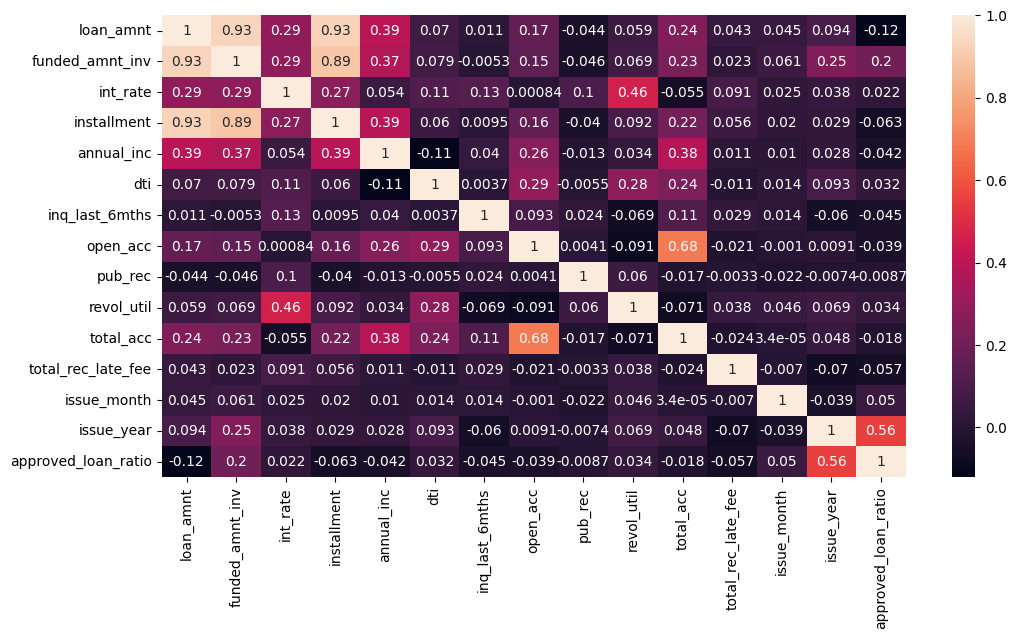

In [117]:
plt.figure(figsize=(12,6))
sns.heatmap(loanDf.corr(), annot=True)
plt.show()

Observations:
1. Loan amount, investor amount, funding amount are strongly correlated.
2. Annual income with DTI(Debt-to-income ratio) is negatively correalted. Debt income ratio is the percentage of a consumer's monthly gross income that goes toward paying debts. That means when annual income is low DTI is high & vice versa.
3. Positive correlation between annual income and employment years. That means income increases with work experience
4. Installment has high positive correlation with loan amount and loan funding amount, as for high loan amount, installment is also higher


Part 6: As per observation funded_amnt field is highly correlated to loan amount, funded amnt inv and installment, hence dropping that column

In [118]:
loanDf = loanDf.drop(columns=["funded_amnt"])

KeyError: "['funded_amnt'] not found in axis"

In [ ]:
loanDf.isna().sum()

loan_amnt                 0
funded_amnt_inv           0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
emp_length             1075
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
inq_last_6mths            0
open_acc                  0
pub_rec                   0
revol_util               50
total_acc                 0
total_rec_late_fee        0
dtype: int64

Part 7: Removing the the null valued rows in the below columns.
1. emp_length             
2. revol_util      
3. last_pymnt_d                      

In [ ]:
loanDf.dropna(subset=["emp_length","revol_util"],inplace=True)

In [119]:
# inq_last_6mths column is not needed as it represents number of inquiries done in last 6 months
loanDf.dropna(subset=["inq_last_6mths"],inplace=True)

### Final shape and size of dataset

In [120]:
loanDf.isna().sum()

loan_amnt              0
funded_amnt_inv        0
term                   0
int_rate               0
installment            0
grade                  0
sub_grade              0
emp_length             0
home_ownership         0
annual_inc             0
verification_status    0
issue_d                0
loan_status            0
purpose                0
dti                    0
inq_last_6mths         0
open_acc               0
pub_rec                0
revol_util             0
total_acc              0
total_rec_late_fee     0
issue_month            0
issue_year             0
approved_loan_ratio    0
dtype: int64

In [121]:
loanDf.shape

(36751, 24)

## Data Analysis

In [122]:
# Load data types for dataframe
loanDf.dtypes

loan_amnt                       int64
funded_amnt_inv               float64
term                           object
int_rate                      float64
installment                   float64
grade                          object
sub_grade                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                datetime64[ns]
loan_status                    object
purpose                        object
dti                           float64
inq_last_6mths                  int64
open_acc                        int64
pub_rec                         int64
revol_util                    float64
total_acc                       int64
total_rec_late_fee            float64
issue_month                     int64
issue_year                      int64
approved_loan_ratio           float64
dtype: object

In [123]:
# Identify numerical cols and categorical cols
numerical_cols = ['loan_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc','dti','revol_util','open_acc','dti','pub_rec','total_acc','total_rec_late_fee']
categorical_cols = ['term','grade','sub_grade','emp_length','home_ownership','verification_status','issue_d','loan_status','purpose']

Analyze content of categorical columns and clean if needed

In [124]:
for col in categorical_cols[:6]:
    print("=================",col,"=================")
    print(loanDf[col].unique())

================= term =================
['36 months' '60 months']
================= grade =================
['B' 'C' 'A' 'E' 'F' 'D' 'G']
================= sub_grade =================
['B2' 'C4' 'C5' 'C1' 'A4' 'E1' 'F2' 'B5' 'C3' 'B1' 'D1' 'A1' 'B3' 'B4'
 'C2' 'D2' 'A3' 'A5' 'D5' 'A2' 'E4' 'D3' 'D4' 'F3' 'E3' 'F1' 'E5' 'G4'
 'E2' 'G2' 'G1' 'F5' 'F4' 'G5' 'G3']
================= emp_length =================
['10+ years' '< 1 year' '3 years' '8 years' '9 years' '4 years' '5 years'
 '1 year' '6 years' '2 years' '7 years']
================= home_ownership =================
['RENT' 'OWN' 'MORTGAGE' 'OTHER' 'NONE']
================= verification_status =================
['Verified' 'Source Verified' 'Not Verified']


In [125]:
for col in categorical_cols[6:]:
    print("=================",col,"=================")
    print(loanDf[col].unique())

================= issue_d =================
['2011-12-01T00:00:00.000000000' '2011-11-01T00:00:00.000000000'
 '2011-10-01T00:00:00.000000000' '2011-09-01T00:00:00.000000000'
 '2011-08-01T00:00:00.000000000' '2011-07-01T00:00:00.000000000'
 '2011-06-01T00:00:00.000000000' '2011-05-01T00:00:00.000000000'
 '2011-04-01T00:00:00.000000000' '2011-03-01T00:00:00.000000000'
 '2011-02-01T00:00:00.000000000' '2011-01-01T00:00:00.000000000'
 '2010-12-01T00:00:00.000000000' '2010-11-01T00:00:00.000000000'
 '2010-10-01T00:00:00.000000000' '2010-09-01T00:00:00.000000000'
 '2010-08-01T00:00:00.000000000' '2010-07-01T00:00:00.000000000'
 '2010-06-01T00:00:00.000000000' '2010-05-01T00:00:00.000000000'
 '2010-04-01T00:00:00.000000000' '2010-03-01T00:00:00.000000000'
 '2010-02-01T00:00:00.000000000' '2010-01-01T00:00:00.000000000'
 '2009-12-01T00:00:00.000000000' '2009-11-01T00:00:00.000000000'
 '2009-10-01T00:00:00.000000000' '2009-09-01T00:00:00.000000000'
 '2009-08-01T00:00:00.000000000' '2009-07-01T0

In [126]:
print(loanDf["term"].unique())
# Cleaning term column
loanDf["term"] = loanDf["term"].str.lstrip()
print(loanDf["term"].unique())

['36 months' '60 months']
['36 months' '60 months']


In [127]:
loanDf["emp_length"].unique()
# TODO: Create a new field for Analysis in Derived column

array(['10+ years', '< 1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '1 year', '6 years', '2 years', '7 years'],
      dtype=object)

In [128]:
loanDf["loan_status"].value_counts()

Fully Paid     31476
Charged Off     5275
Name: loan_status, dtype: int64

In [129]:
# Loan Status Column has 3 distict values out of them we need only Fully Paid and Charged Off. Removing rows for Current as they are not useful in understanding the trend
loanDf = loanDf[loanDf["loan_status"] != "Current"]
loanDf.shape

(36751, 24)

In [130]:
# Converting columne to datetime type
loanDf['issue_d'] = pd.to_datetime(loanDf.issue_d, format='%b-%y')

Analysing Numerical data fields

numerical_cols = ['loan_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc','dti','revol_util','inq_last_6mths','open_acc','pub_rec','total_acc']

In [131]:
print(loanDf["total_acc"].unique())
print(loanDf["total_acc"].dtype)

[ 9  4 10 37 12 11 13  3 23 34 29 28 42 14 22 38 21 17  7 31 44 16  6 18
 27 25 40 35 24  8 20 15 19 36 26 51 30 32 33 46  5 61 56 50 41 79 62 43
 47 53 45 60 55 39 52 58 54 57 49 63 48 59 87 75 72 64 67 78 74 66 81 90
 80 71 69 73 70 68 65  2 76]
int64


In [132]:
# Remove percentage from int_rate column
print(loanDf["int_rate"].unique())
loanDf["int_rate"] = loanDf["int_rate"].str.replace("%","").astype(float)
print(loanDf["int_rate"].unique())

[10.65 15.27 15.96 13.49  7.9  18.64 21.28 12.69 14.65  9.91 16.29  6.03
 11.71 12.42 14.27 16.77  7.51  8.9  18.25  6.62 19.91 17.27 17.58 21.67
 19.42 20.89 20.3  23.91 19.03 23.13 22.74 22.35 22.06 24.11  6.   23.52
  7.49 11.99  5.99 10.99  9.99 18.79 11.49 15.99 16.49  6.99 12.99 14.79
 15.23  5.42  8.49 17.49 10.59 15.62 19.29 13.99 18.39 16.89 17.99 20.99
 22.85 19.69 20.62 20.25 21.36 21.74 23.22 22.48 22.11 23.59 12.62 18.07
 11.63  7.91  7.42 11.14 20.2  12.12 19.39 16.11 17.54 22.64 16.59 17.19
 12.87 20.69  9.67 21.82 19.79 18.49 13.84 22.94 24.4  21.48 14.82  7.29
 17.88 20.11 16.02 13.43 14.91 13.06 15.28 17.14 11.11 10.37 14.17 16.4
 15.65 17.51  7.66 10.74  5.79  6.92 10.    9.63 14.54 12.68 18.62 19.36
 13.8  18.99 21.59 20.85 19.74 20.48 21.22  6.91 12.23 12.61 10.36  6.17
  6.54  9.25 16.69 15.95  8.88 13.35  9.62 16.32 12.98 14.83 13.72 14.09
 14.46 20.03 17.8  15.2  15.57 18.54 19.66 17.06 18.17 17.43 20.4  20.77
 18.91 21.14 17.44 13.23 11.12  7.88 13.61 10.38 17.

AttributeError: Can only use .str accessor with string values!

In [ ]:
# Remove percentage from int_rate column
print(loanDf["revol_util"].unique())
loanDf["revol_util"] = loanDf["revol_util"].str.replace("%","").astype(float)
print(loanDf["revol_util"].unique())

['83.70%' '9.40%' '98.50%' ... '49.63%' '0.04%' '7.28%']
[8.370e+01 9.400e+00 9.850e+01 ... 4.963e+01 4.000e-02 7.280e+00]


In [133]:
loanDf[numerical_cols].dtypes

loan_amnt               int64
funded_amnt_inv       float64
int_rate              float64
installment           float64
annual_inc            float64
dti                   float64
revol_util            float64
open_acc                int64
dti                   float64
pub_rec                 int64
total_acc               int64
total_rec_late_fee    float64
dtype: object

## Univariate Analysis (Numerical columns)

In [134]:
loanDf[numerical_cols].describe()

,loan_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,revol_util,open_acc,dti,pub_rec,total_acc,total_rec_late_fee
count,36751.000000,36751.000000,36751.000000,36751.000000,36751.000000,36751.000000,36751.000000,36751.000000,36751.000000,36751.000000,36751.000000,36751.000000
mean,10822.516394,9986.668096,11.913112,314.850777,65478.835423,13.339065,48.787895,9.269136,13.339065,0.054284,21.949961,1.356327
std,6967.454737,6611.586931,3.646943,193.223830,34831.328474,6.646600,28.288085,4.380697,6.646600,0.235762,11.350269,7.220166
min,500.000000,0.000000,5.420000,15.690000,4000.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000
25%,5362.500000,5000.000000,8.940000,165.880000,40582.500000,8.230000,25.500000,6.000000,8.230000,0.000000,13.000000,0.000000
50%,9600.000000,8562.036308,11.710000,276.510000,58100.000000,13.430000,49.200000,9.000000,13.430000,0.000000,20.000000,0.000000
75%,15000.000000,13950.000000,14.270000,417.220000,80004.000000,18.590000,72.300000,12.000000,18.590000,0.000000,29.000000,0.000000
max,35000.000000,35000.000000,24.400000,920.850000,235000.000000,29.990000,99.900000,44.000000,29.990000,4.000000,90.000000,180.200000


### Check for outliers in numerical cols

In [135]:
def plot_distribution_box(dataDF,col,title):
    #Increasing the figure size of plot
    plt.figure(figsize=(12,4))
    #Setting subplot index
    plt.subplot(1,2,1)
    #Histogram plot
    sns.distplot(a=dataDF[col], rug=True)
    plt.subplot(1,2,2)
    #Box plot
    dataDF[col].plot.box()
    #Single title for both subplots.
    plt.suptitle(title)
    plt.show()

In [136]:
def percentile_dist(dataDF,col):
    return dataDF[col].describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

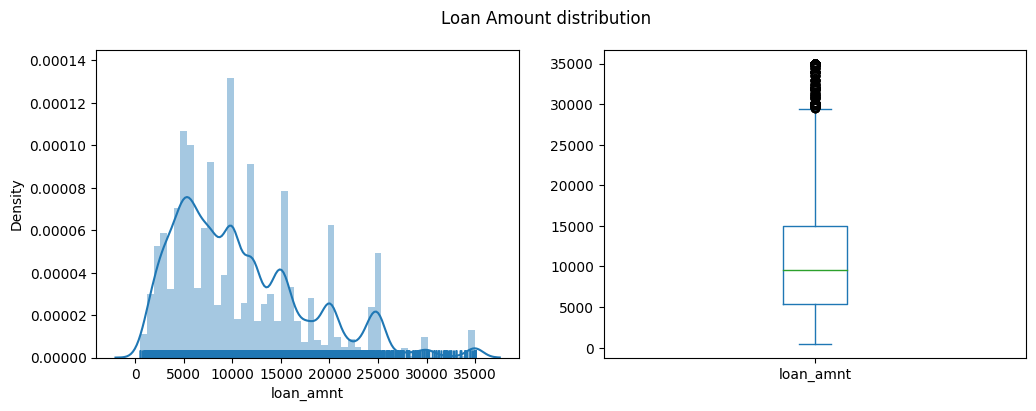

count    36751.000000
mean     10822.516394
std       6967.454737
min        500.000000
5%        2400.000000
10%       3200.000000
25%       5362.500000
50%       9600.000000
75%      15000.000000
90%      20000.000000
95%      25000.000000
99%      32300.000000
max      35000.000000
Name: loan_amnt, dtype: float64


In [137]:
plot_distribution_box(loanDf,"loan_amnt",'Loan Amount distribution')
print(percentile_dist(loanDf,"loan_amnt"))

Observation: Most people have taken loan of around 10K as median and mean both are around same value. Maximum people have taken a loan of less than 25K as it is the 95th percentile of data distribution, after that only few people have taken loan in range of 25K to 35K

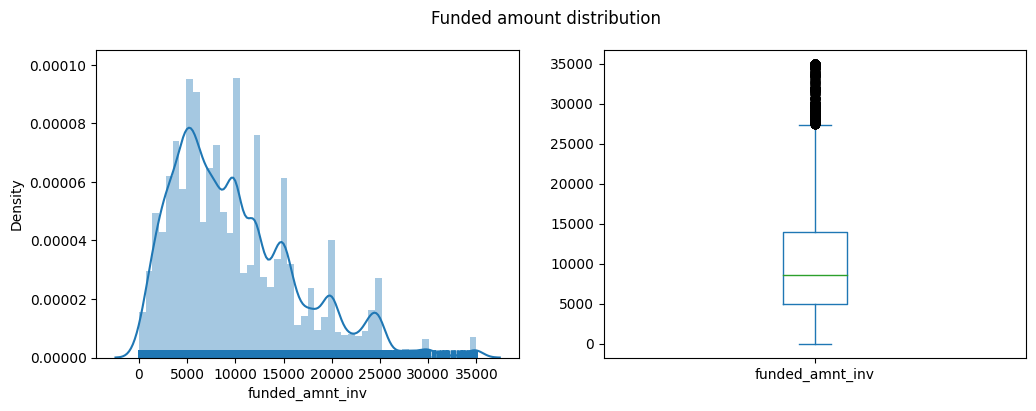

count    36751.000000
mean      9986.668096
std       6611.586931
min          0.000000
5%        1800.000000
10%       2875.000000
25%       5000.000000
50%       8562.036308
75%      13950.000000
90%      19836.381680
95%      23832.113800
99%      29975.000000
max      35000.000000
Name: funded_amnt_inv, dtype: float64


In [138]:
# Approved loan
plot_distribution_box(loanDf,"funded_amnt_inv",'Funded amount distribution')
print(percentile_dist(loanDf,"funded_amnt_inv"))

Observation: Most people have taken loan of around 10K as median and mean both are around same value. Maximum people have taken a loan of less than 25K as it is the 95th percentile of data distribution, after that only few people have taken loan in range of 25K to 35K

Trend of data is same as loan requested amount

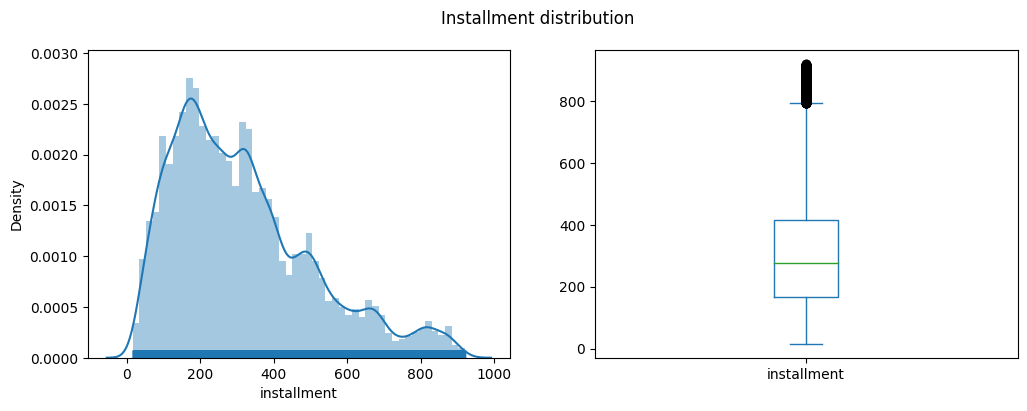

count    36751.000000
mean       314.850777
std        193.223830
min         15.690000
5%          72.060000
10%         99.630000
25%        165.880000
50%        276.510000
75%        417.220000
90%        596.120000
95%        702.700000
99%        866.025000
max        920.850000
Name: installment, dtype: float64


In [139]:
plot_distribution_box(loanDf,"installment",'Installment distribution')
print(percentile_dist(loanDf,"installment"))

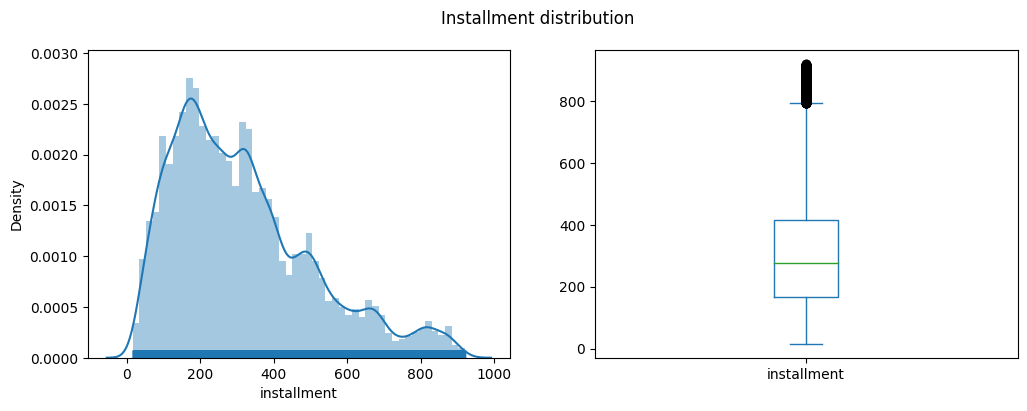

count    36751.000000
mean       314.850777
std        193.223830
min         15.690000
5%          72.060000
10%         99.630000
25%        165.880000
50%        276.510000
75%        417.220000
90%        596.120000
95%        702.700000
99%        866.025000
max        920.850000
Name: installment, dtype: float64


In [140]:
plot_distribution_box(loanDf[loanDf["installment"]<=921],"installment",'Installment distribution')
print(percentile_dist(loanDf[loanDf["installment"]<=921],"installment"))

Observation: Installment distribution is static after 921 of value, 99 percentile is at 921 and for 1 percentile people installment is more than that. As per analysis , this is for people who applied for a loan of more than 25000. We can drop the outliers for installment

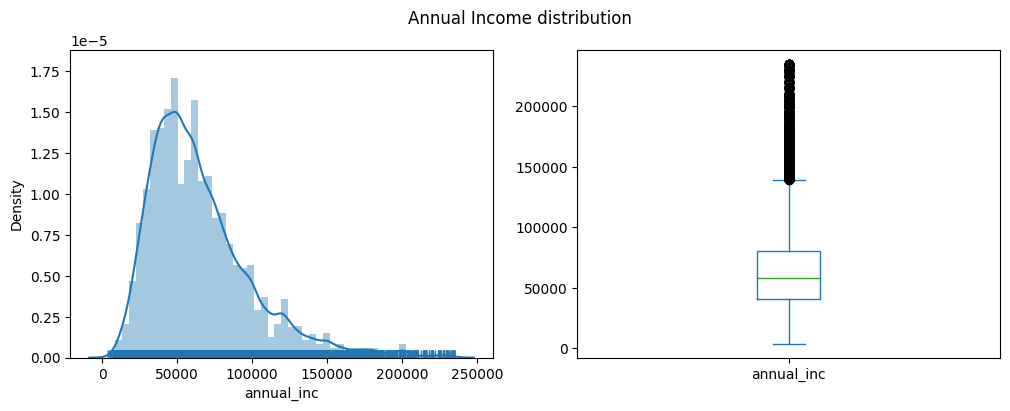

count     36751.000000
mean      65478.835423
std       34831.328474
min        4000.000000
5%        24000.000000
10%       30000.000000
25%       40582.500000
50%       58100.000000
75%       80004.000000
90%      110000.000000
95%      133275.000000
99%      186998.000000
max      235000.000000
Name: annual_inc, dtype: float64

In [141]:
plot_distribution_box(loanDf,"annual_inc",'Annual Income distribution')
loanDf["annual_inc"].describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

Observation: There are a lot of outliers in annual income field, 99 percentile customers have annual income below 235K and rest are outliers and we can skip from data

In [142]:
# Number of records to be deleted
len(loanDf[loanDf["annual_inc"] > 235000])

0

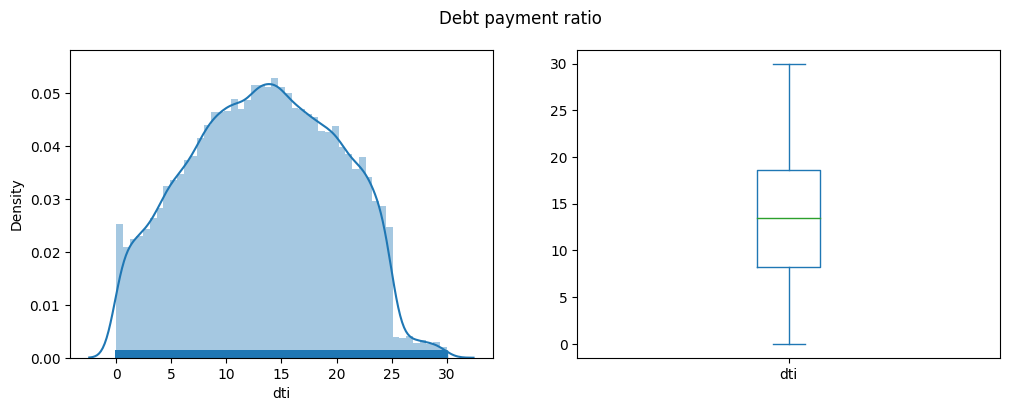

In [143]:
plot_distribution_box(loanDf,"dti",'Debt payment ratio')

Observation: Distribution seems even across the data, and no outliers are observed

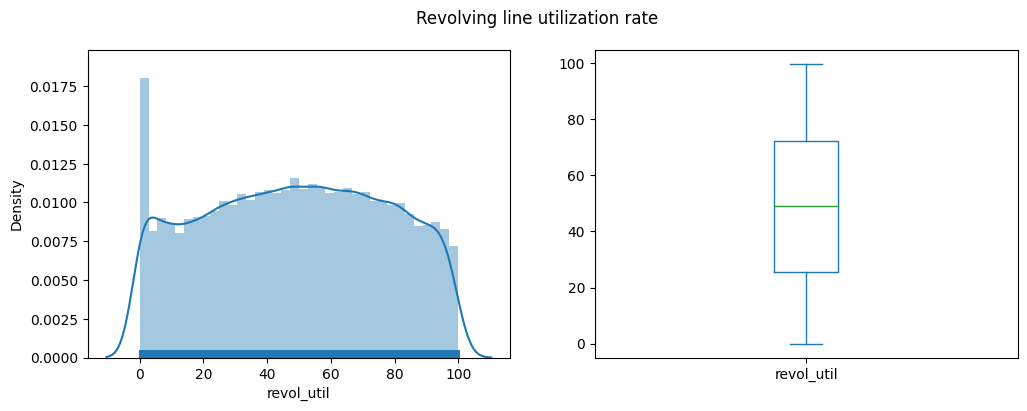

In [144]:
plot_distribution_box(loanDf,"revol_util",'Revolving line utilization rate')

Observation: Distribution seems even across the data, and no outliers are observed, there is a spike at 0

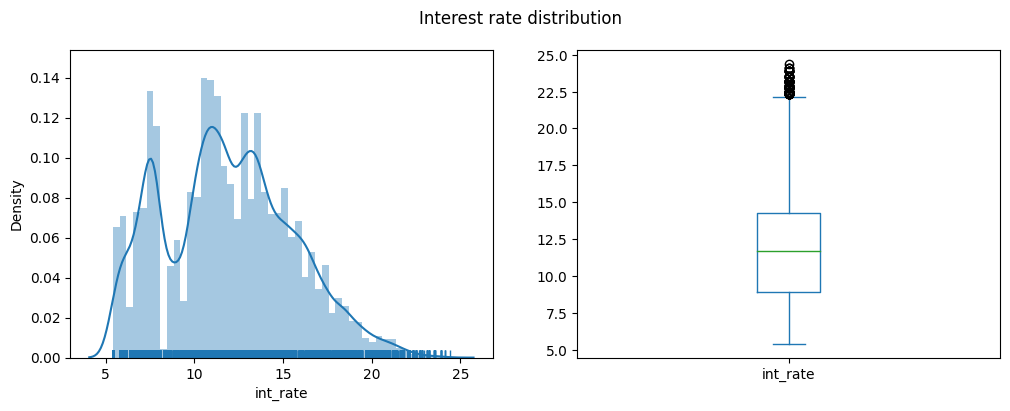

count    36751.000000
mean        11.913112
std          3.646943
min          5.420000
5%           6.170000
10%          7.140000
25%          8.940000
50%         11.710000
75%         14.270000
90%         16.770000
95%         18.250000
99%         20.890000
max         24.400000
Name: int_rate, dtype: float64


In [145]:
# Approved loan
plot_distribution_box(loanDf,"int_rate",'Interest rate distribution')
print(percentile_dist(loanDf,"int_rate"))

In [146]:
# Remove outliers on the basis of installment field
loanDf = loanDf[loanDf["installment"]<=921]
loanDf.shape

(36751, 24)

In [147]:
# Remove outliers on the basis of annual income field
loanDf = loanDf[loanDf["annual_inc"] <= 235000]
loanDf.shape

(36751, 24)

## Derived Columns

In [148]:
# Create date reated columns for loan issue date
loanDf["issue_month"] = loanDf.issue_d.dt.month
loanDf["issue_year"] = loanDf.issue_d.dt.year

In [149]:
# As observed funded amount and loan amount are highly correlated fields, we can create a ratio variable to understand the ratio of loan approved on the basis of loan status
loanDf["approved_loan_ratio"] = loanDf["funded_amnt_inv"]/loanDf["loan_amnt"]

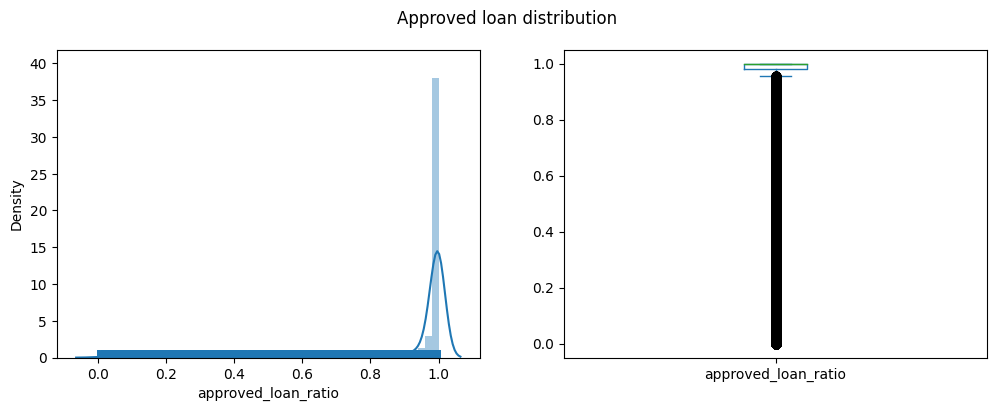

count    36751.000000
mean         0.936423
std          0.175514
min          0.000000
5%           0.577921
10%          0.798000
25%          0.981816
50%          0.999167
75%          1.000000
90%          1.000000
95%          1.000000
99%          1.000000
max          1.000000
Name: approved_loan_ratio, dtype: float64


In [150]:
# Approved loan
plot_distribution_box(loanDf,"approved_loan_ratio",'Approved loan distribution')
print(percentile_dist(loanDf,"approved_loan_ratio"))

Observation: Loan Amount upto 98% of requested amount is approved for most of the people as the 25th percentile is at 98 percent

## Univariate Analysis (Categorical columns)

### Note: Univariate analysis for numerical columns is covered with outlier identification in above steps

In [151]:
categorical_cols=['term',
 'grade',
 'sub_grade',
 'emp_length',
 'home_ownership',
 'verification_status',
 'purpose',
 'issue_month',
 'issue_year']
target = 'loan_status'

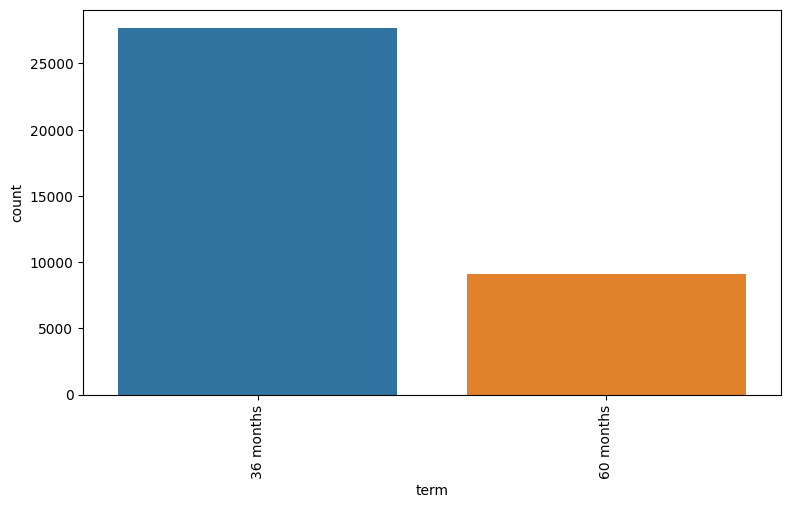

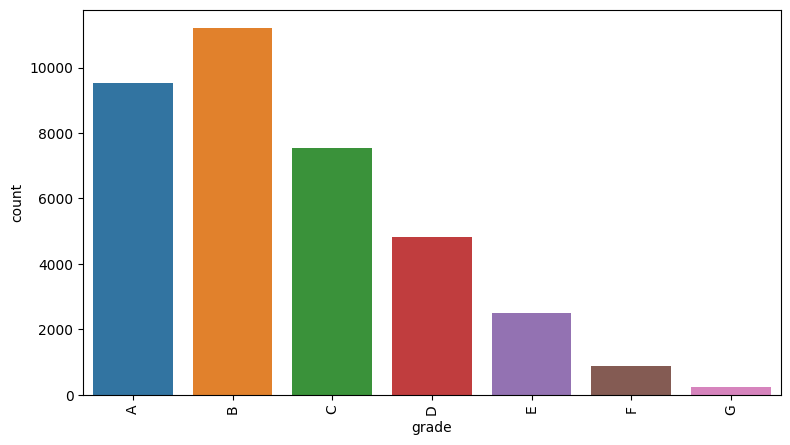

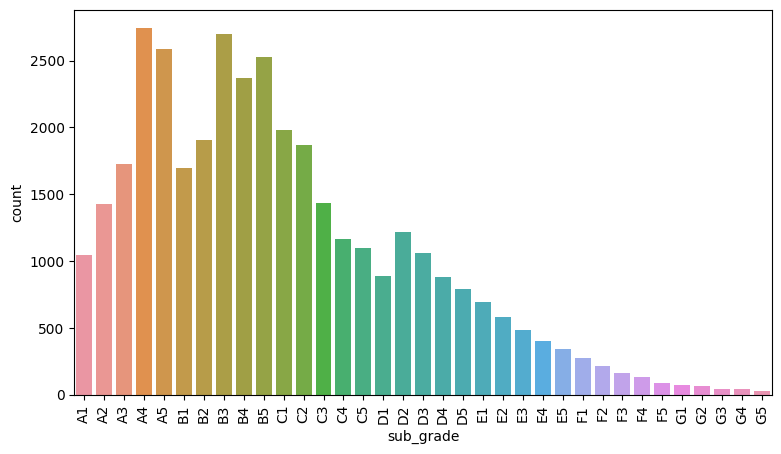

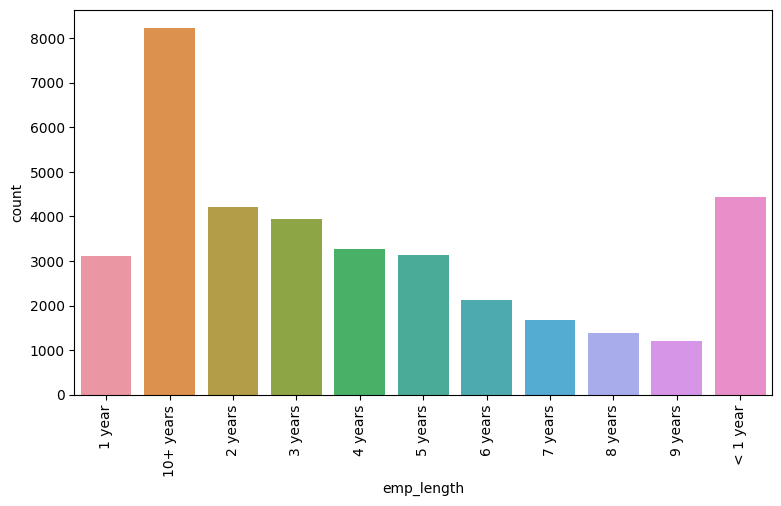

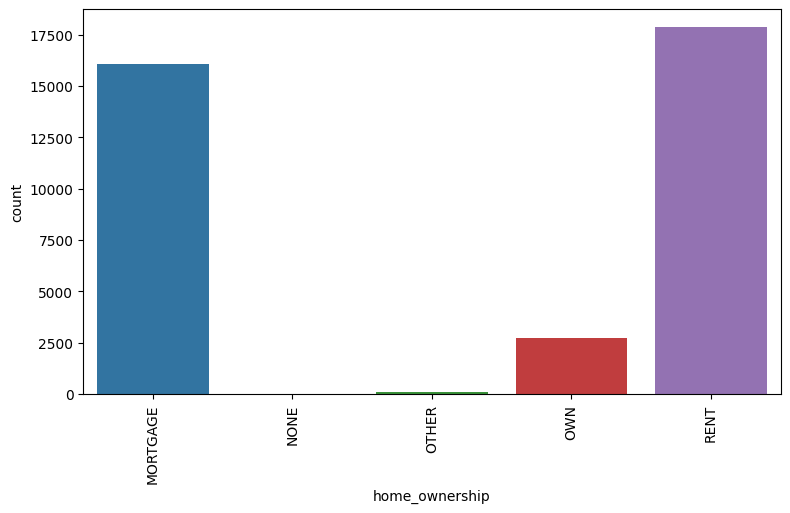

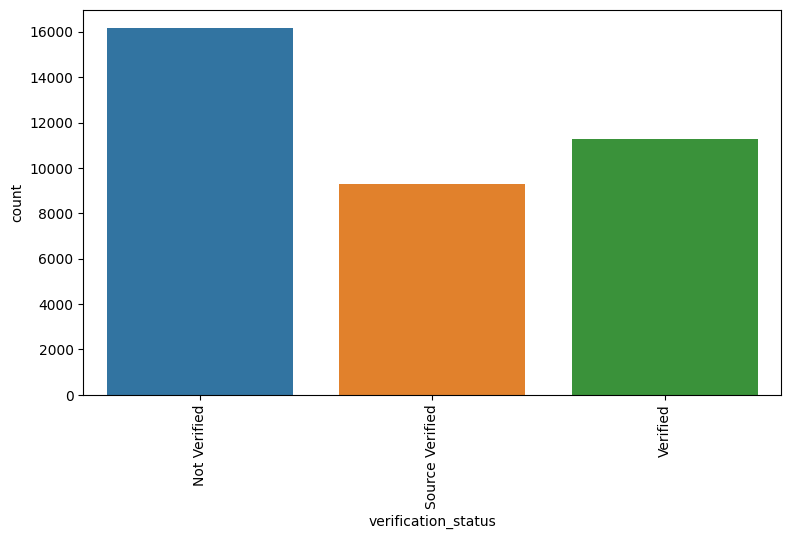

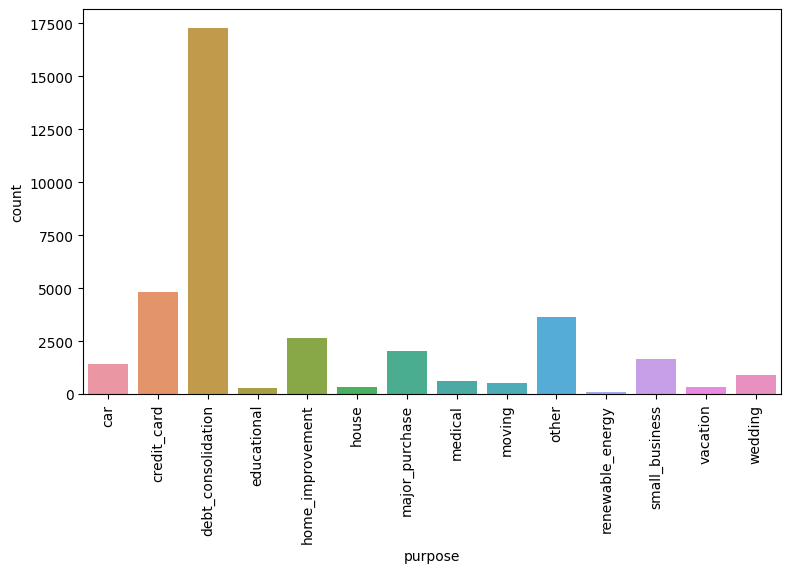

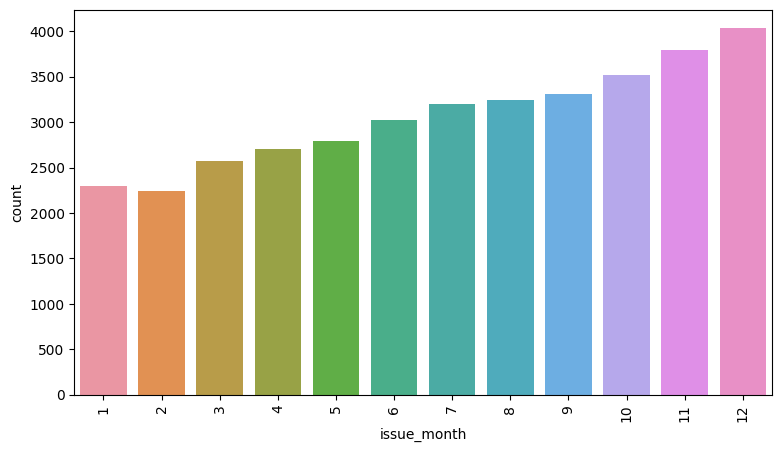

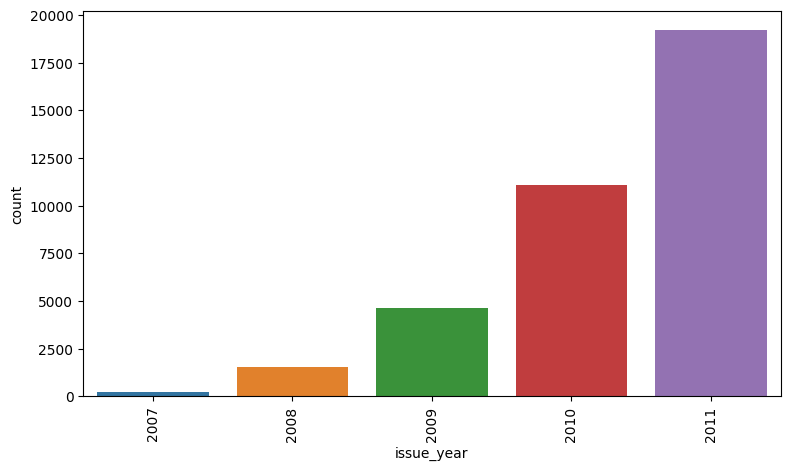

In [152]:
# Count plot for the categorical variable to understand the distribution

for x in categorical_cols:
      plt.figure(figsize=(9,5))
      plt.xticks(rotation=90)
      sns.countplot(x =x, data = loanDf,order=loanDf[x].value_counts().index.sort_values())
      plt.show()

Observations:
1. Borrowers are taking more loans in 36months term duration
2. Most of the borrowers are in A, B and C grade category and very few people in EFG grades.
3. Subgrade shows the similar distribution trend as grades, grade segments borrowers based on behaviors, hence we can exclude sub grade column
4. Maximum number of loans are taken by people who have been employed for more than 10 years
5. People who have either rented out property or have mortgaged their home have high chances of taking a loan
6. Most of the people are taking loan for debt consolidation
7. Most of the loans were issues in 2011,and number of loan applications are increasing every year
8. Most of the people generally take loans towards the end of the year

## Bivariate Analysis

Lets try to analyze the loan status, the target variable, against some columns which might have played an important role in charged off of loans. 

In [153]:
def bivariate_plot(col,dataDF, isNumeric = False, chargeOffFilterEnabled = False):
    fig, ax1 = plt.subplots(figsize=(9, 5))
    ax1.set_title(col+" trade off with Charged Off")
    plt.xticks(rotation=90)
    if chargeOffFilterEnabled:
        dataDF = dataDF[dataDF['loan_status']=='Charged Off']
    # plt.subplot(1,2,1)
    
    if isNumeric:
        # plt.subplot(1,2,2)
        sns.boxplot(y=col,x="loan_status" ,data=dataDF,palette='rainbow')
    else:
        sns.countplot(x=col,data=dataDF,hue='loan_status', order=dataDF[col].value_counts().index.sort_values())
    plt.show()

In [154]:
numerical_cols

['loan_amnt',
 'funded_amnt_inv',
 'int_rate',
 'installment',
 'annual_inc',
 'dti',
 'revol_util',
 'open_acc',
 'dti',
 'pub_rec',
 'total_acc',
 'total_rec_late_fee']

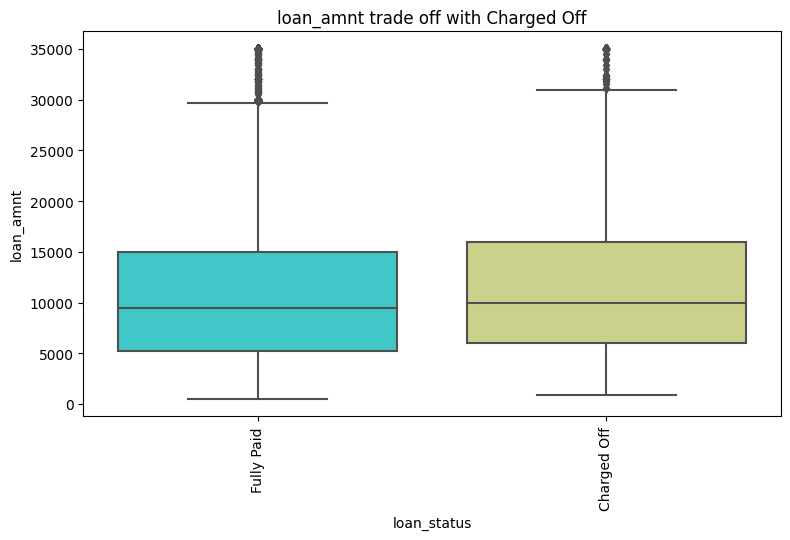

In [155]:
# Loan Status  + loan_amnt
bivariate_plot("loan_amnt",loanDf, isNumeric = True)

Observation: Charged Off loans have higher amounts than Fully Paid ones.

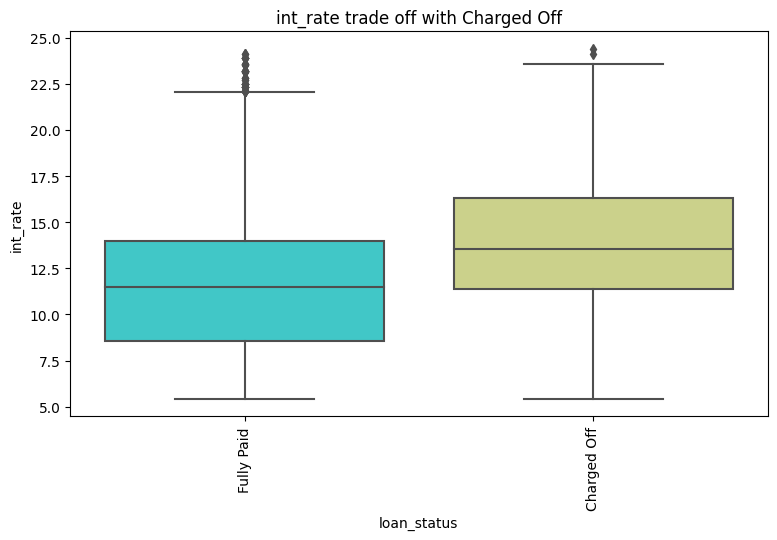

In [156]:
# Loan Status + int_rate
bivariate_plot("int_rate",loanDf, isNumeric = True)

Observations: This Chart clearly potrays, higher the interest rate more are the chance of Defaulting the loan.

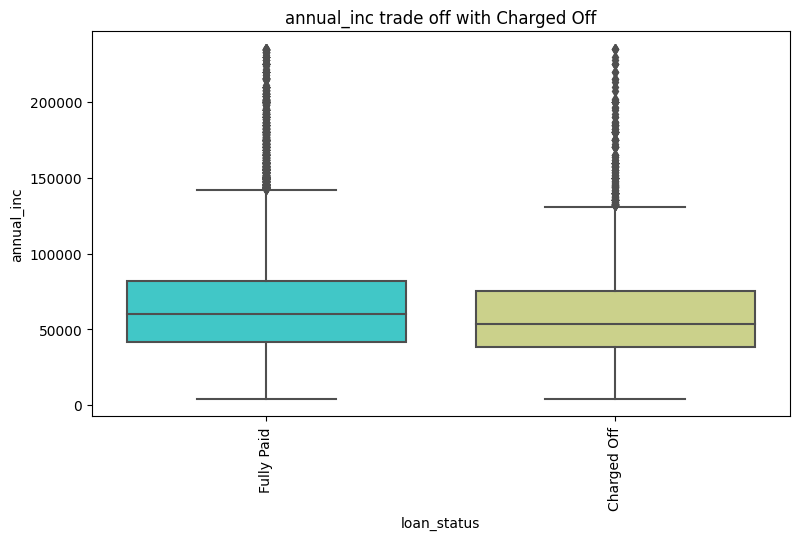

In [157]:
# Loan Status + annual_inc
bivariate_plot("annual_inc",loanDf, isNumeric = True)

Observation: Annual Income of the people marked Charged off is less than people whose loan is fully paid

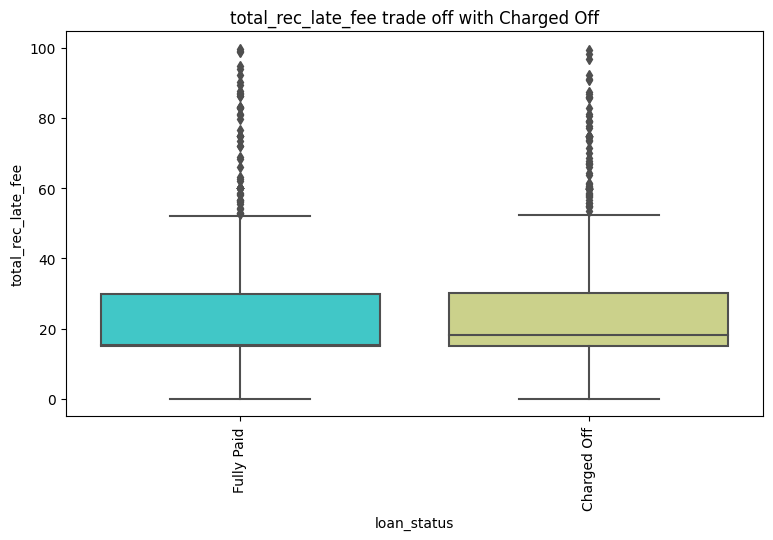

In [158]:
# Loan Status + total_rec_late_fee
bivariate_plot("total_rec_late_fee",loanDf[(loanDf["total_rec_late_fee"]>0) & (loanDf["total_rec_late_fee"] <= 100)], isNumeric = True)

Observation: People paying more late fees are more likely to default, as shown by the median, in case of Fully Paid its more towards 25th percentile, however it is towards center for Charged off

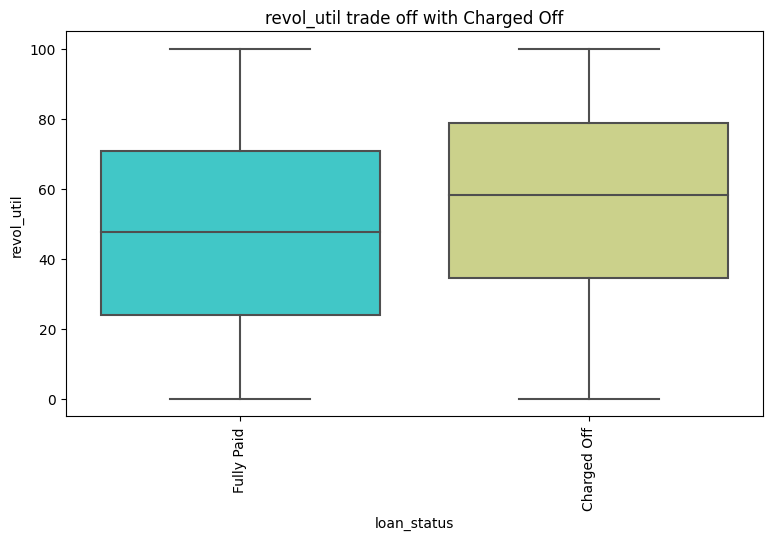

In [159]:
# Loan Status + revol_util
bivariate_plot("revol_util",loanDf, isNumeric = True)

Observation: The amount of credit the borrower is using relative to all available revolving credit is higher for people marked Charged Off

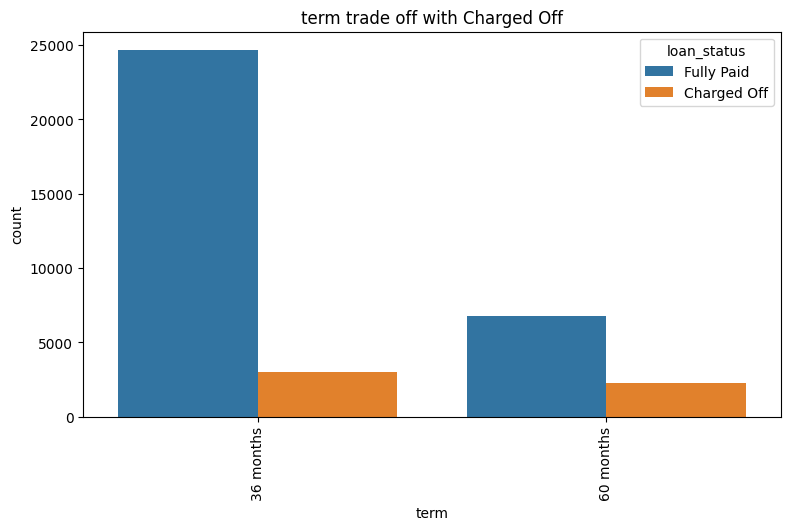

In [160]:
bivariate_plot("term",loanDf)

Observation: People who had taken loan of term 60 months has higher percentage of going charged off as compared to people who are taking loan for 36 month term duration, proportion of Charged Off to Total loan applications is more in case of 60 months term

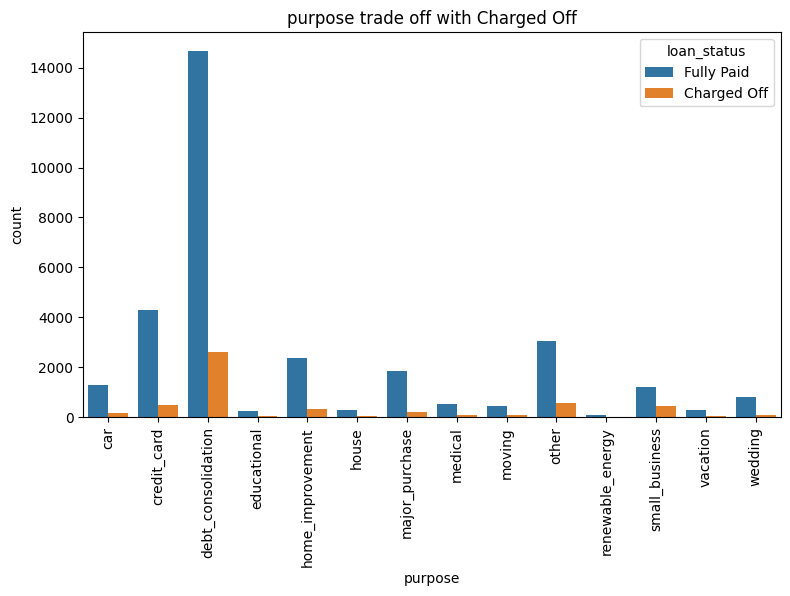

In [161]:
bivariate_plot("purpose",loanDf)

Observation: Small business applicants are more likely to go charged off, proportion for Charged off to total is high 

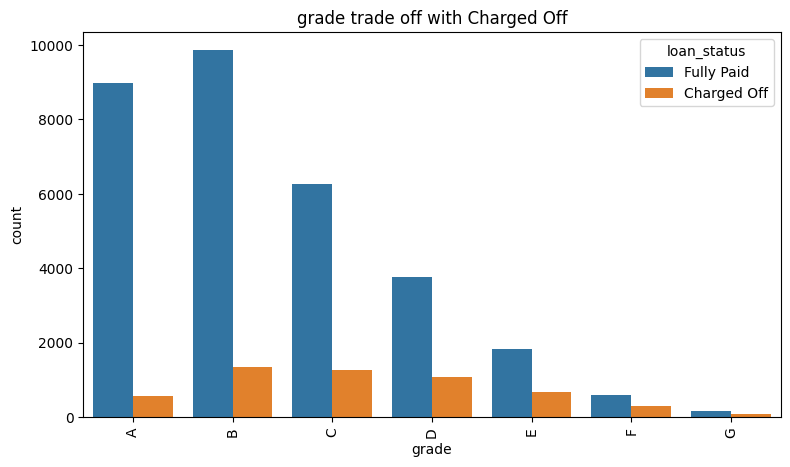

In [162]:
bivariate_plot("grade",loanDf)

Observations:
1. Grade "A" has very less chances of charged off as the proportion is lowest.
2. Grade "F" and "G" have very high chances of charged off as the proportion is higher.
3. Chances of charged off is increasing with grade moving from "A" towards "G" (Segmentation Univariate Analysis)

In [163]:
# Calculating Charge of proportion for better analysis
gradeloandf = loanDf.groupby(['grade', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
gradeloandf['Total'] = gradeloandf['Charged Off'] + gradeloandf['Fully Paid'] 
gradeloandf['Chargedoff_ratio'] = gradeloandf['Charged Off'] / gradeloandf['Total']
gradeloandf.sort_values('Chargedoff_ratio', ascending=False)

loan_status,grade,Charged Off,Fully Paid,Total,Chargedoff_ratio
6,G,85,169,254,0.334646
5,F,282,602,884,0.319005
4,E,673,1835,2508,0.268341
3,D,1068,3771,4839,0.220707
2,C,1274,6268,7542,0.168921
1,B,1339,9858,11197,0.119586
0,A,554,8973,9527,0.058151


<AxesSubplot: xlabel='grade', ylabel='Chargedoff_ratio'>

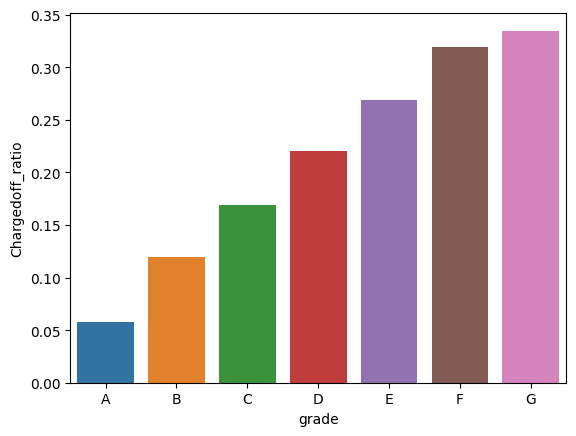

In [164]:
# Plotting Charged off ratio vs grade 
sns.barplot(y="Chargedoff_ratio",x="grade",data=gradeloandf)

As observed, Charged off ratio is increasing with Grade moving from "A" towards "G", and hence grade can be used to identify the people who can default

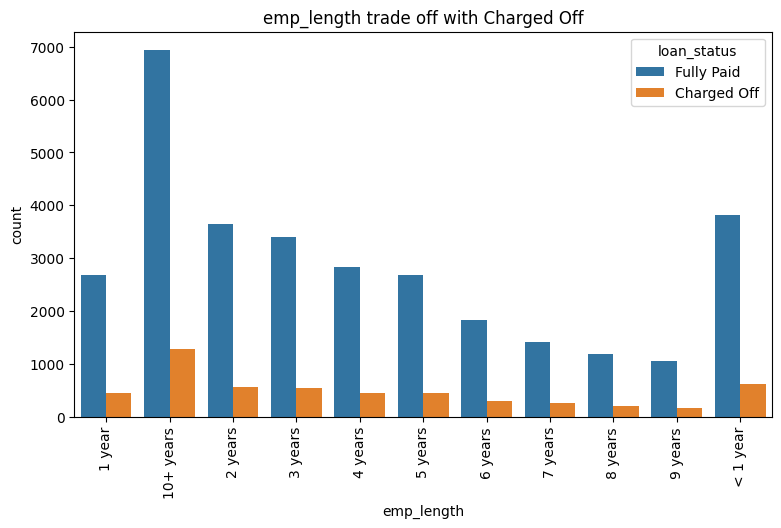

In [165]:
# Loan status + Emp Length
bivariate_plot("emp_length",loanDf)

In [166]:
# Calculating Charge of proportion for better analysis
emploandf = loanDf.groupby(['emp_length', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
emploandf['Total'] = emploandf['Charged Off'] + emploandf['Fully Paid'] 
emploandf['Chargedoff_ratio'] = emploandf['Charged Off'] / emploandf['Total']
emploandf.sort_values('Chargedoff_ratio', ascending=False)

loan_status,emp_length,Charged Off,Fully Paid,Total,Chargedoff_ratio
1,10+ years,1288,6936,8224,0.156615
7,7 years,256,1416,1672,0.153110
0,1 year,449,2672,3121,0.143864
5,5 years,450,2680,3130,0.143770
8,8 years,200,1195,1395,0.143369
10,< 1 year,625,3813,4438,0.140829
6,6 years,298,1831,2129,0.139972
3,3 years,549,3397,3946,0.139128
4,4 years,447,2831,3278,0.136364
2,2 years,556,3652,4208,0.132129


No significant trend observed in emp_length, however, ratio is slightly more for people with 10 * year of experience

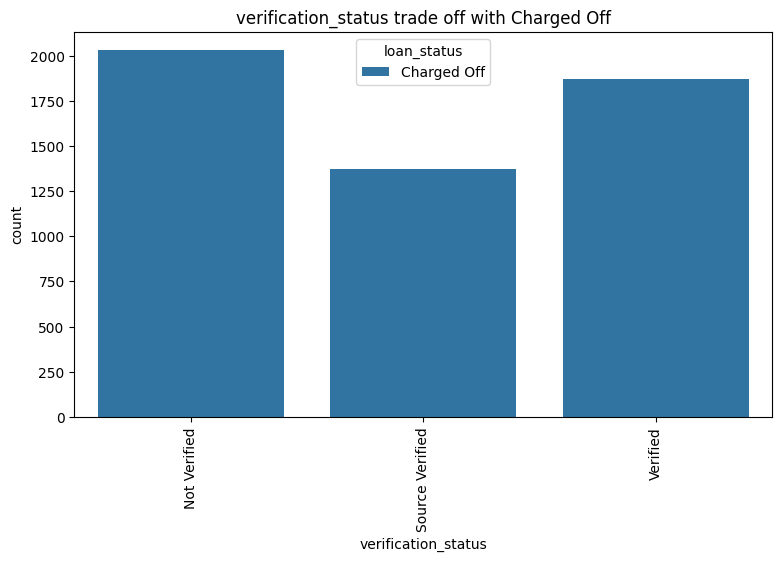

In [167]:
# Verification status + Loan Status
bivariate_plot("verification_status",loanDf,chargeOffFilterEnabled=True)

Observation: Maximum cases of charged off are those for which applications are not verified, and it makes sense and thus it is important that verification should be done for applicants to reduce defaults

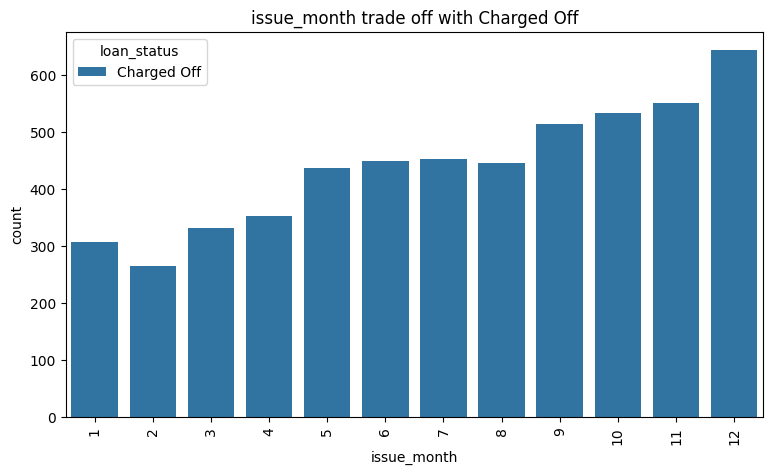

In [168]:
# issue_month + Loan Status
bivariate_plot("issue_month",loanDf,chargeOffFilterEnabled=True)

Observation: Most of the people who default have applied for loan on December month

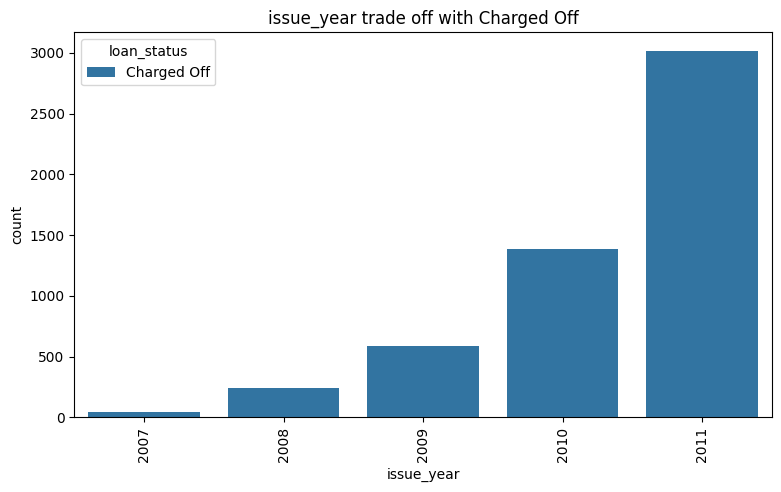

In [169]:
# issue_year + Loan Status
bivariate_plot("issue_year",loanDf,chargeOffFilterEnabled=True)


Observation: Number of applicants defaulting is increasing year over year linearly

## Multivariate Analysis
As per the above observations, following fields seems to impact loan status field:
1. Grade
2. loan_amount
3. int_rate
4. purpose
5. Year of issued application
6. total_rec_late_fee
7. verification_status
8. annual_inc

In [170]:
# To understand the correlation between all the values, lets convert categorical points to numerical representations
new_loanDf = loanDf[["loan_amnt","annual_inc","int_rate","grade","purpose","verification_status","issue_year","total_rec_late_fee","loan_status"]].copy()

In [171]:
# Grade A-G can be represented by 1-6
new_loanDf["grade"] = new_loanDf["grade"].apply(lambda x: ord(x)-64)

In [172]:
def Convert(lst):
    res_dct = map(lambda i: (lst[i],i+1), range(len(lst)))
    return dict(res_dct)
purpose_dict = Convert(loanDf["purpose"].sort_values().unique().tolist())
verification_dict = Convert(loanDf["verification_status"].sort_values().unique().tolist())
loan_status_dict = Convert(loanDf["loan_status"].sort_values().unique().tolist())

In [173]:
# Transform purpose field
new_loanDf["purpose"] = new_loanDf["purpose"].apply(lambda x: purpose_dict[x])

In [174]:
# Transform verification_status field
new_loanDf["verification_status"] = new_loanDf["verification_status"].apply(lambda x: verification_dict[x])

In [176]:
# Transform loan status field
new_loanDf["loan_status"] = new_loanDf["loan_status"].apply(lambda x: loan_status_dict[x])

KeyError: 2

In [177]:
new_loanDf.dtypes

loan_amnt                int64
annual_inc             float64
int_rate               float64
grade                    int64
purpose                  int64
verification_status      int64
issue_year               int64
total_rec_late_fee     float64
loan_status              int64
dtype: object

<AxesSubplot: >

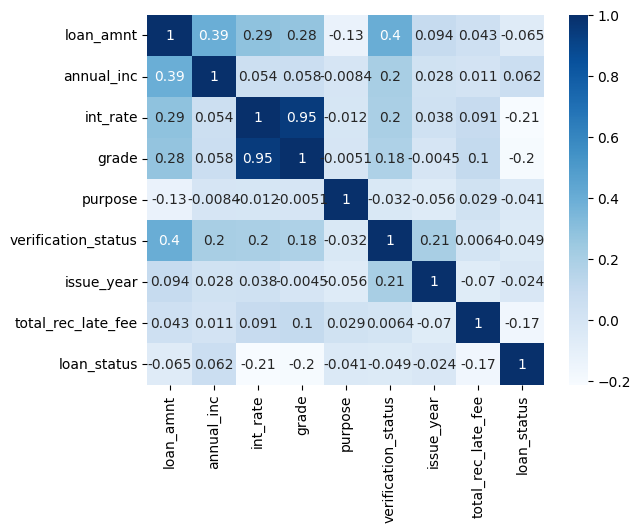

In [178]:
sns.heatmap(new_loanDf.corr(),annot = True, cmap='Blues')

Observations: 
1. There is high correlation between Grade and interest rate
2. There is negative correlation between all features and loan status field, i.e., loan status moved towards 0 state (Charged Off) for higher values of loan amount, annual inc, interest rate, purpose (small business), issue year, late fees, which we have already observed in previous analytical charts

In [179]:
import numpy as np
# Lets draw a pair plot for multivariate analysis
new_loanDf_pair = loanDf[["loan_amnt","annual_inc","int_rate","loan_status"]]
# Take the log of below variables as they are heavily skewed
new_loanDf_pair['loan_amnt'] = np.log10(new_loanDf_pair['loan_amnt'])
new_loanDf_pair['annual_inc'] = np.log10(new_loanDf_pair['annual_inc'])
new_loanDf_pair['int_rate'] = np.log10(new_loanDf_pair['int_rate'])

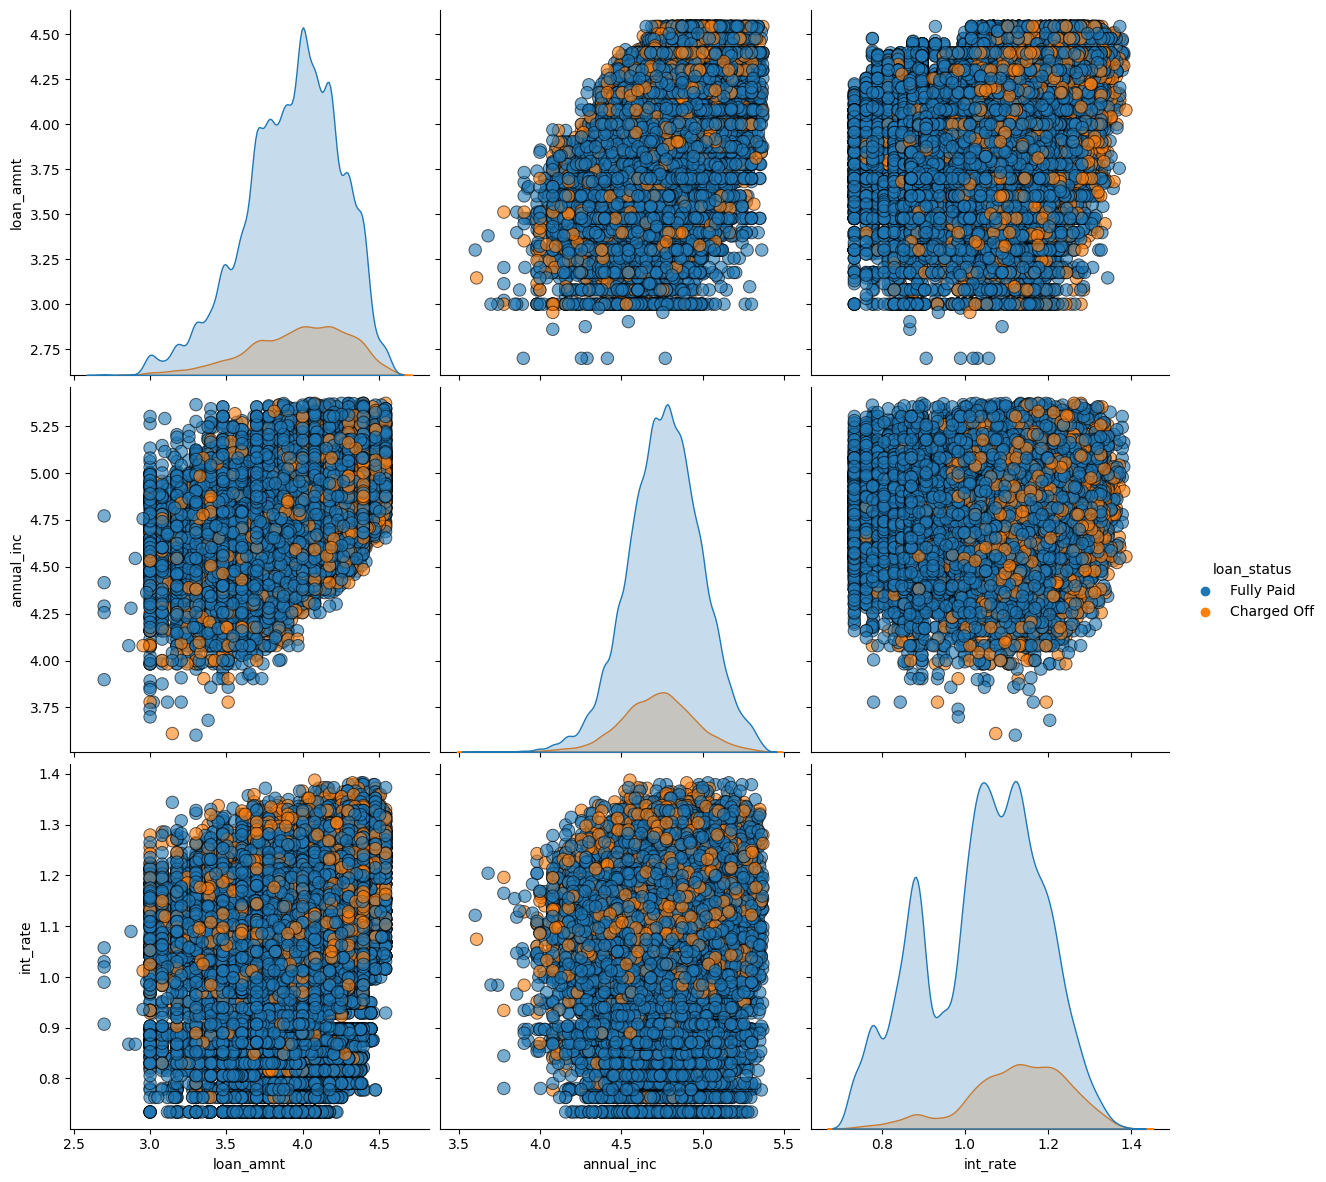

In [180]:
sns.pairplot(new_loanDf_pair, hue = 'loan_status', diag_kind = 'kde',
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 4)

Observation: Same trends can be observed with pair plots

## Conclusion

As per the exploratory data analysis below are key takeaways:

1. Higher the intrest rate higher charged off ratio

2. Higher the annual income higher the loan amount slightly.

3. Intrest rate is increasing with loan amount increase

4. Number of people defaulting is increasing every year

5. People paying more late fees are more likely to default., i.e., if they are regularing delaying monthly payments for loan, more likely they are undergoing monetary crunch and are likely to default

6. People taking loan for small business are more likely to default

7. People whose verification is pending are more likely to default
